In [86]:

import numpy as np
import pandas as pd
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set() ## this is for styling
#import profiling as pp 


In [87]:
df = pd.read_csv("DatasetwithMedIncome_External_Recoded.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle


In [89]:
df_process = pd.read_csv("DatasetwithMedIncome_External_Recoded.csv")
df_process.head()

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle


In [90]:
#drop the rows from countries mexico and canada
indexcountry = df[ (df['sales_country'] == 'Canada') ].index
df.drop(indexcountry , inplace=True)

indexcountry = df[ (df['sales_country'] == 'Mexico') ].index
df.drop(indexcountry , inplace=True)
df.head(15)

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
5,5,5,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
6,6,6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
7,7,7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
8,8,8,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
9,9,9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,80000,Middle,Middle


In [91]:
#drop the rows from countries mexico and canada
indexcountry = df_process[ (df_process['sales_country'] == 'Canada') ].index
df_process.drop(indexcountry , inplace=True)

indexcountry = df_process[ (df_process['sales_country'] == 'Mexico') ].index
df_process.drop(indexcountry , inplace=True)
df_process.head(15)

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
5,5,5,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
6,6,6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
7,7,7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
8,8,8,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
9,9,9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,80000,Middle,Middle


In [92]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  38892 non-null  int64  
 1   Unnamed: 0                                    38892 non-null  int64  
 2   food_category                                 38892 non-null  object 
 3   food_department                               38892 non-null  object 
 4   food_family                                   38892 non-null  object 
 5   store_sales(in millions)                      38892 non-null  float64
 6   store_cost(in millions)                       38892 non-null  float64
 7   unit_sales(in millions)                       38892 non-null  float64
 8   promotion_name                                38892 non-null  object 
 9   sales_country                                 38892 non-null 

In [93]:
#encode the varibales gender
encoding_dict={'M':1,'F':0}
df_process['gender']=df_process['gender'].map(encoding_dict)
df_process.head(20)

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
5,5,5,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
6,6,6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle
7,7,7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle
8,8,8,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low
9,9,9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,...,0.720285,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,80000,Middle,Middle


In [94]:
#encode the varibales marital_status
encoding_dict1={'M':1,'S':0}
df_process['marital_status']=df_process['marital_status'].map(encoding_dict1)


In [95]:
#encode the varibales house owner
encoding_dict1={'Y':1,'N':0}
df_process['houseowner']=df_process['houseowner'].map(encoding_dict1)


In [96]:
#encode the varibales education
encoding_dict1={'Partial High School':1,'Bachelors Degree':5,'High School Degree':2,'Graduate Degree':4,'Partial College':3}
df_process['education']=df_process['education'].map(encoding_dict1)
df_process['education']

0        1
1        5
2        1
3        2
4        1
        ..
60421    2
60422    1
60423    1
60424    2
60425    2
Name: education, Length: 38892, dtype: int64

In [97]:
#encode the varibales occupation
encoding_dict1={'Skilled Manual':1,'Professional':3,'Manual':2,'Management':4,'Clerical':1}
df_process['occupation']=df_process['occupation'].map(encoding_dict1)
df_process['occupation']

0        1
1        3
2        2
3        2
4        1
        ..
60421    3
60422    1
60423    1
60424    1
60425    2
Name: occupation, Length: 38892, dtype: int64

In [98]:
#convert the data types to int
df_process['total_children'] = df_process['total_children'].astype(int)



In [99]:
#convert the income field to string
df_process['avg. yearly_income'] = df_process['avg. yearly_income'].astype(str)
#create 2 variables using the income range
df_process[['Sal_Min','Sal_Max']] = df_process['avg. yearly_income'].str.split("-", expand=True)
#remove the $ sign
df_process['Sal_Min'] = df_process['Sal_Min'].str.replace('$', '')
df_process['Sal_Min'] = df_process['Sal_Min'].str.replace('K', '000')
df_process['Sal_Min'] = df_process['Sal_Min'].str.replace('+', '')
df_process['Sal_Min']
#df_process.head()


/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_6294/1187044835.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_process['Sal_Min'] = df_process['Sal_Min'].str.replace('$', '')
/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_6294/1187044835.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_process['Sal_Min'] = df_process['Sal_Min'].str.replace('+', '')


0         10000 
1         50000 
2         10000 
3         30000 
4         30000 
          ...   
60421    130000 
60422     50000 
60423     10000 
60424     30000 
60425     30000 
Name: Sal_Min, Length: 38892, dtype: object

In [100]:
df_process['Sal_Min'] = df_process['Sal_Min'].astype(int)
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  38892 non-null  int64  
 1   Unnamed: 0                                    38892 non-null  int64  
 2   food_category                                 38892 non-null  object 
 3   food_department                               38892 non-null  object 
 4   food_family                                   38892 non-null  object 
 5   store_sales(in millions)                      38892 non-null  float64
 6   store_cost(in millions)                       38892 non-null  float64
 7   unit_sales(in millions)                       38892 non-null  float64
 8   promotion_name                                38892 non-null  object 
 9   sales_country                                 38892 non-null 

In [101]:
df_process['Sal_Max'] = df_process['Sal_Max'].astype(str)
df_process['Sal_Max'] = df_process['Sal_Max'].str.replace('$', '')
df_process['Sal_Max'] = df_process['Sal_Max'].str.replace('K', '000')
df_process['Sal_Max'] = np.where(df_process['Sal_Max'] == 'None', df_process['Sal_Min'], df_process['Sal_Max'])
df_process['Sal_Max'] = df_process['Sal_Max'].astype(int)
df_process.info()
#df_process.head()

/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_6294/2324390378.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_process['Sal_Max'] = df_process['Sal_Max'].str.replace('$', '')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  38892 non-null  int64  
 1   Unnamed: 0                                    38892 non-null  int64  
 2   food_category                                 38892 non-null  object 
 3   food_department                               38892 non-null  object 
 4   food_family                                   38892 non-null  object 
 5   store_sales(in millions)                      38892 non-null  float64
 6   store_cost(in millions)                       38892 non-null  float64
 7   unit_sales(in millions)                       38892 non-null  float64
 8   promotion_name                                38892 non-null  object 
 9   sales_country                                 38892 non-null 

In [102]:
df_process.head()

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country,Sal_Min,Sal_Max
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,10000,30000
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle,50000,70000
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,10000,30000
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,30000,50000
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,30000,50000


In [103]:
df2 = df_process[['marital_status','gender','total_children','education','occupation','houseowner','Sal_Min','Sal_Max']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   marital_status  38892 non-null  int64
 1   gender          38892 non-null  int64
 2   total_children  38892 non-null  int64
 3   education       38892 non-null  int64
 4   occupation      38892 non-null  int64
 5   houseowner      38892 non-null  int64
 6   Sal_Min         38892 non-null  int64
 7   Sal_Max         38892 non-null  int64
dtypes: int64(8)
memory usage: 2.7 MB


In [104]:
#-	identify the optimal number of clusters
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

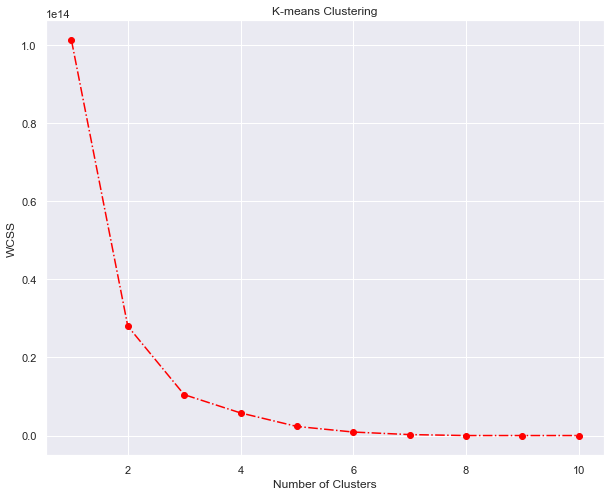

In [105]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [136]:
df2.head(5)

,marital_status,gender,total_children,education,occupation,houseowner,Sal_Min,Sal_Max,y_kmeans,cen_x,cen_y,c
0,1,0,1,1,1,1,10000,30000,1,0.487460,0.515621,#81DF20
1,1,1,0,5,3,1,50000,70000,2,0.490817,0.492815,#2095DF
2,0,0,4,1,2,0,10000,30000,1,0.487460,0.515621,#81DF20
3,1,0,2,2,2,1,30000,50000,1,0.487460,0.515621,#81DF20
4,1,1,0,1,1,0,30000,50000,1,0.487460,0.515621,#81DF20


In [59]:
#Let’s perform K-Means clustering with 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(df2)


KMeans(n_clusters=3, random_state=42)

In [60]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df_process.copy()


In [61]:
df_segm_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  38892 non-null  int64  
 1   Unnamed: 0                                    38892 non-null  int64  
 2   food_category                                 38892 non-null  object 
 3   food_department                               38892 non-null  object 
 4   food_family                                   38892 non-null  object 
 5   store_sales(in millions)                      38892 non-null  float64
 6   store_cost(in millions)                       38892 non-null  float64
 7   unit_sales(in millions)                       38892 non-null  float64
 8   promotion_name                                38892 non-null  object 
 9   sales_country                                 38892 non-null 

In [62]:
df_process['Segment K-means'] = kmeans.labels_



In [63]:
df_segm_analysis = df_process.groupby(['Segment K-means']).mean()
df_segm_analysis

,Unnamed: 0.1,Unnamed: 0,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,occupation,...,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,Sal_Min,Sal_Max
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,30204.782282,30204.782282,6.549760,2.607244,3.085667,0.507731,0.502089,2.467614,2.881321,3.288132,...,0.865301,-0.134699,7.205802,0.895131,-0.104869,1.552975,0.552975,136598.412035,126598.412035,143159.214375
1,29967.353577,29967.353577,6.544514,2.619643,3.087849,0.487460,0.515621,2.533068,1.788555,1.658323,...,0.861545,-0.138455,7.173227,0.891084,-0.108916,1.545954,0.545954,31891.148722,21891.148722,41891.148722
2,29975.116883,29975.116883,6.457283,2.586118,3.066856,0.490817,0.492815,2.471990,4.071313,3.114193,...,0.866541,-0.133459,7.264990,0.902483,-0.097517,1.565731,0.565731,72336.893875,62336.893875,82336.893875


In [64]:
df_process.head(20)

,Unnamed: 0.1,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,...,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country,Sal_Min,Sal_Max,Segment K-means
0,0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,...,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,10000,30000,1
1,1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,...,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle,50000,70000,2
2,2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,...,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,10000,30000,1
3,3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,...,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,30000,50000,1
4,4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,...,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,30000,50000,1
5,5,5,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,...,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle,50000,70000,2
6,6,6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,...,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,30000,50000,1
7,7,7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,...,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle,50000,70000,2
8,8,8,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,...,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,10000,30000,1
9,9,9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,...,0.626087,-0.373913,1.086207,0.086207,80000,Middle,Middle,70000,90000,2


In [65]:
df_process.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'food_category', 'food_department',
       'food_family', 'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_withoutTax', 'AnnualMedianIncome_AfterTax',
       'population_city_EXTERNAL', 'cst_living_fam_4_mthly_city_EXTERNAL',
       'AVG_cst_living_fam_4_mthly_national_EXTERNAL', 'milk_1L_1qt_EXTERNAL',

In [66]:
df3=df_process.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   food_category                                 38892 non-null  object 
 1   food_department                               38892 non-null  object 
 2   food_family                                   38892 non-null  object 
 3   store_sales(in millions)                      38892 non-null  float64
 4   store_cost(in millions)                       38892 non-null  float64
 5   unit_sales(in millions)                       38892 non-null  float64
 6   promotion_name                                38892 non-null  object 
 7   sales_country                                 38892 non-null  object 
 8   marital_status                                38892 non-null  int64  
 9   gender                                        38892 non-null 

In [67]:
df3.to_csv('USA_segment_added_Dataset_withencode.csv')